In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from bokeh import mpl
from bokeh.charts import HeatMap, bins, output_file, show
from bokeh.layouts import column, gridplot
from bokeh.palettes import RdYlGn6, RdYlGn9

pd.set_option('display.max_columns', None)

In [2]:
pd.read_csv('wholedata_selected.csv', index_col=0).head(2)

,eventid,iyear,extended,country_txt,region_txt,city,latitude,longitude,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,weaptype1,weaptype1_txt,nkill,nwound,property
0,197000000001,1970,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,0.0,0,1,0,1,Assassination,14,Private Citizens & Property,13,Unknown,1.0,0.0,0
1,197000000002,1970,0,Mexico,North America,Mexico city,19.432608,-99.133207,0.0,0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),13,Unknown,0.0,0.0,0


In [187]:
df4 = pd.read_csv('wholedata_selected.csv', usecols=['iyear', 'country_txt', 'region_txt', 'attacktype1_txt', 'nkill', 'nwound']).dropna()

In [192]:
df4.columns = ['year', 'country', 'region', 'attacktype', 'nkill', 'nwound']

In [193]:
df4.head()

,year,country,region,attacktype,nkill,nwound
0,1970,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0
1,1970,Mexico,North America,Hostage Taking (Kidnapping),0.0,0.0
2,1970,Philippines,Southeast Asia,Assassination,1.0,0.0
5,1970,United States,North America,Armed Assault,0.0,0.0
6,1970,Uruguay,South America,Assassination,0.0,0.0


In [190]:
df5 = df4.sort_values(['year', 'region'])
df5.head()

,year,country,region,attacktype,casualties,nwound
565,1970,Australia,Australasia & Oceania,Bombing/Explosion,0.0,0.0
0,1970,Dominican Republic,Central America & Caribbean,Assassination,1.0,0.0
25,1970,Guatemala,Central America & Caribbean,Assassination,1.0,0.0
112,1970,Guatemala,Central America & Caribbean,Hostage Taking (Kidnapping),0.0,0.0
151,1970,Dominican Republic,Central America & Caribbean,Hostage Taking (Kidnapping),0.0,0.0


In [191]:
df5.shape

(142154, 6)

In [8]:
df5.groupby('region').nkill.agg(['count', 'sum', 'max'])

,count,sum,max
region,,,
Australasia & Oceania,238,145.000000,17.0
Central America & Caribbean,7835,25597.000000,300.0
Central Asia,527,937.000000,50.0
East Asia,740,816.000000,48.0
Eastern Europe,4624,6052.000000,344.0
Middle East & North Africa,37551,89929.400000,670.0
North America,3140,1864.000000,329.0
South America,16718,26781.000000,119.0
South Asia,36262,78772.000000,518.0


In [9]:
# periods are partitioned by every 5 years
# eg. period 1990 means from year 1990 to year 1994
df5['period'] = [int(i/5)*5 for i in df5.year]

In [10]:
couple_columns = df5[['nkill', 'period', 'region']]
couple_columns.reset_index(inplace=True)
cp_cols = couple_columns.drop('index', 1)
cp_cols.head(3)

,nkill,period,region
0,0.0,1970,Australasia & Oceania
1,1.0,1970,Central America & Caribbean
2,1.0,1970,Central America & Caribbean


In [11]:
p_r = cp_cols.groupby(['period', 'region']).sum()
print(p_r.shape)
p_r.head(15)

(116, 1)


nkill
period region                            
1970   Australasia & Oceania          1.0
       Central America & Caribbean    3.0
       East Asia                      1.0
       Eastern Europe                28.0
       Middle East & North Africa    95.0
       North America                129.0
       South America                 60.0
       South Asia                     1.0
       Southeast Asia               132.0
       Sub-Saharan Africa             6.0
       Western Europe               323.0
1975   Australasia & Oceania          2.0
       Central America & Caribbean  749.0
       East Asia                     11.0
       Eastern Europe                 5.0

In [12]:
p_r = p_r.reset_index()
p_r.head()

,period,region,nkill
0,1970,Australasia & Oceania,1.0
1,1970,Central America & Caribbean,3.0
2,1970,East Asia,1.0
3,1970,Eastern Europe,28.0
4,1970,Middle East & North Africa,95.0


In [13]:
p_r_nk = p_r.pivot('period', 'region', 'nkill').fillna(0)
p_r_nk

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
period,,,,,,,,,,,,
1970,1.0,3.0,0.0,1.0,28.0,95.0,129.0,60.0,1.0,132.000000,6.0,323.0
1975,2.0,749.0,0.0,11.0,5.0,1054.0,114.0,474.0,100.0,489.000000,414.0,632.0
1980,14.0,17360.0,0.0,4.0,7.0,2510.0,61.0,6028.0,906.0,952.000000,1748.0,931.0
1985,38.0,5738.0,0.0,33.0,9.0,2520.0,342.0,8758.0,8818.0,2445.000000,3492.0,1032.0
1990,44.0,1414.0,467.0,73.0,489.0,5211.0,129.0,6005.0,8621.0,2189.000000,7529.0,537.0
1995,31.0,248.0,296.0,116.0,855.0,7764.0,589.0,2992.0,6957.0,1013.999998,7237.0,188.0
2000,9.0,55.0,72.0,33.0,1731.0,5616.4,264.0,1250.0,5013.0,1430.000000,2413.0,289.0
2005,0.0,12.0,55.0,38.0,487.0,20901.0,59.0,511.0,13419.0,1717.000000,4148.0,92.0
2010,4.0,18.0,34.0,434.0,1683.0,31618.0,124.0,579.0,27465.0,2454.000000,12628.0,107.0


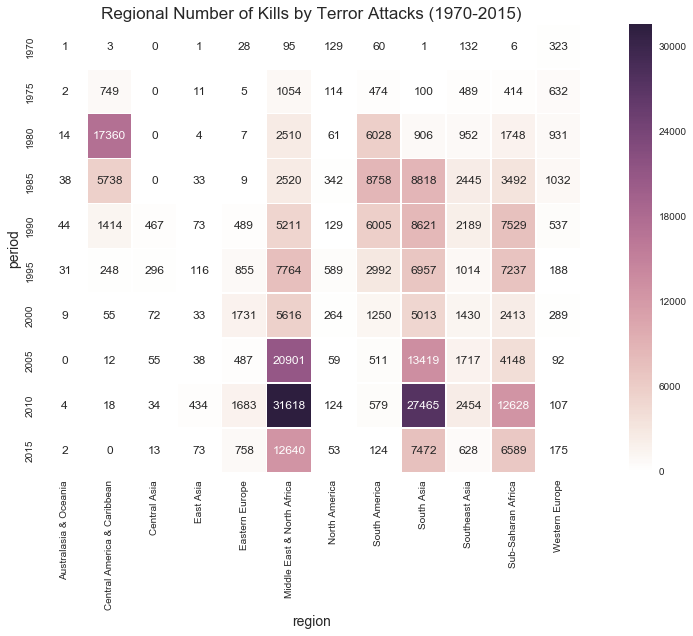

In [14]:
fig = plt.figure(figsize=(14, 9))
pivot_table = p_r.pivot('period', 'region', 'nkill').fillna(0)
plt.title('Regional Number of Kills by Terror Attacks (1970-2015)', size = 17)
plt.xlabel('Regions', size = 14)
plt.ylabel('Periods: Interval=5', size = 14)
plt.xticks(rotation=-15)

# palette choices
cmap1 = sns.cubehelix_palette(light=1, as_cmap=True)
cmap2 = sns.dark_palette('palegreen', as_cmap=True)
cmap3 = 'RdBu_r'
cmap4 = 'Reds'
cmap5 = 'Purples'
cmap6 = 'YlGnBu'
cmap7 = 'GnBu'

# plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='.0f', 
            linewidth=.5, square=True, cmap=cmap1)

# output_file("mpl_plot.html", title="mpl_plot.py example")
# show(mpl.to_bokeh())

fig.tight_layout()
plt.show()

## Try Year and Country

In [15]:
df5.head()

,year,country,region,nkill,nwound,period
565,1970,Australia,Australasia & Oceania,0.0,0.0,1970
0,1970,Dominican Republic,Central America & Caribbean,1.0,0.0,1970
25,1970,Guatemala,Central America & Caribbean,1.0,0.0,1970
112,1970,Guatemala,Central America & Caribbean,0.0,0.0,1970
151,1970,Dominican Republic,Central America & Caribbean,0.0,0.0,1970


In [16]:
couple_columns2 = df5[['year', 'country', 'nkill']]
couple_columns2.reset_index(inplace=True)
cp_cols2 = couple_columns2.drop('index', 1)
cp_cols2.head(3)

,year,country,nkill
0,1970,Australia,0.0
1,1970,Dominican Republic,1.0
2,1970,Guatemala,1.0


In [17]:
y_c = cp_cols2.groupby(['year', 'country']).sum()
print(y_c.shape)
y_c.head()

(3458, 1)


nkill
year country         
1970 Argentina    5.0
     Australia    0.0
     Belgium      0.0
     Bolivia      0.0
     Brazil       2.0

In [18]:
y_c = y_c.reset_index()
y_c.head()

,year,country,nkill
0,1970,Argentina,5.0
1,1970,Australia,0.0
2,1970,Belgium,0.0
3,1970,Bolivia,0.0
4,1970,Brazil,2.0


In [19]:
y_c_nk = y_c.pivot('year', 'country', 'nkill').fillna(0)
y_c_nk.head()

country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia-Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Czechoslovakia,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,East Germany (GDR),East Timor,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Grenada,Guadeloupe,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,International,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kosovo,Kuwait,Kyrgyzstan,Laos,Latvia,Lebanon,Lesotho,Liberia,Libya,Lithuania,Luxembourg,Macau,Macedonia,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nepal,Netherlands,New Caledonia,New Hebrides,New Zealand,Nicaragua,Niger,Nigeria,North Korea,North Yemen,Norway,Pakistan,Panama,Papua New Guinea,Paraguay,People's Republic of the Congo,Peru,Philippines,Poland,Portugal,Qatar,Republic of the Congo,Rhodesia,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Serbia-Montenegro,Seychelles,Sierra Leone,Singapore,Slovak Republic,Slovenia,Solomon Islands,Somalia,South Africa,South Korea,South Sudan,South Vietnam,South Yemen,Soviet Union,Spain,Sri Lanka,St. Kitts and Nevis,St. Lucia,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vatican City,Venezuela,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,33.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1971,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1972,0.0,0.0,0.0,0.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0

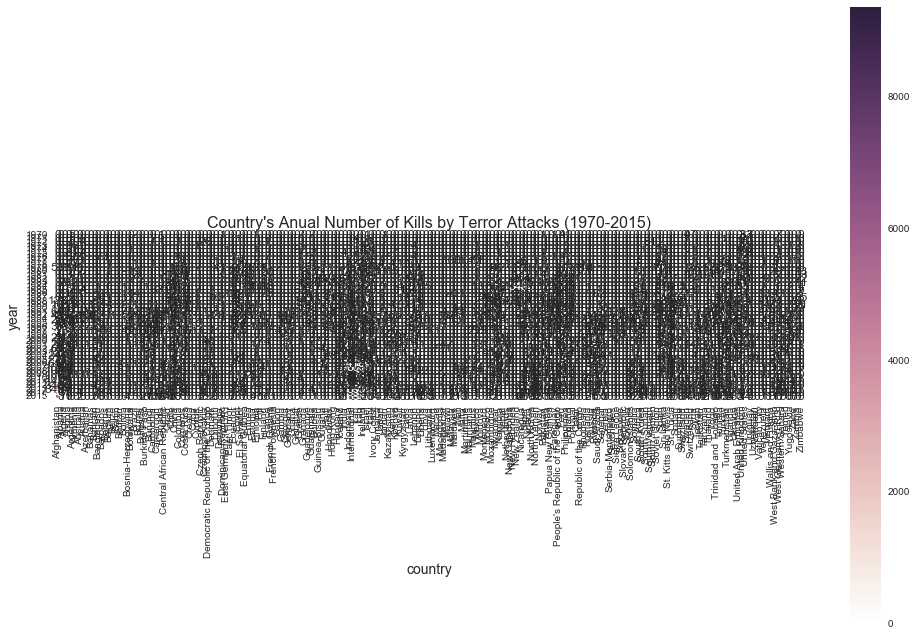

In [20]:
fig = plt.figure(figsize=(14, 9))
pivot_table = y_c.pivot('year', 'country', 'nkill').fillna(0)
plt.title('Country\'s Anual Number of Kills by Terror Attacks (1970-2015)', size = 16)
plt.xlabel('Regions', size = 14)
plt.ylabel('Periods: Interval=5', size = 14)
plt.xticks(rotation=-15)
cmap1 = sns.cubehelix_palette(light=1, as_cmap=True)
# plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='.0f', 
            linewidth=.5, square=True, cmap=cmap1)
fig.tight_layout()
plt.show()

#### This is not realizable, so I decide to make heatmap by countries within each regions.

In [21]:
region_names = df5.region.unique().tolist()
print(region_names)

['Australasia & Oceania', 'Central America & Caribbean', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe', 'Central Asia']


In [82]:
ccc = {}  # the dictionary of countries with regions as keys
for region in region_names:
    ccc[region] = df5[df5.region==region].dropna().country.unique()
    
len(ccc['Central Asia'])

8

#### The above printing result shows that heatmap by countries are workable.

In [23]:
print(region_names)

['Australasia & Oceania', 'Central America & Caribbean', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe', 'Central Asia']


In [ ]:
class Heatmap_Chart_Data():
    def __init__():
        

In [184]:


def plt_heatmap(region_sel, nk_or_nw):
    '''
    This function 
    '''
    dat = df5[df5.region == region_sel]
    couple_cols = dat[['year', 'country', nk_or_nw]]
    couple_cols.reset_index(inplace=True)
    cp_cols = couple_cols.drop('index', 1)
    y_c = cp_cols.groupby(['year', 'country']).sum()
    y_c = y_c.reset_index()
    y_c_n = y_c.pivot('year', 'country', nk_or_nw).fillna(0)

    fig = plt.figure(figsize=(25, int(len(ccc[region_sel])*2/3)))
    pivot_table = y_c.pivot('country', 'year', nk_or_nw).fillna(0)
    plt.title('Country Anual-{} in {} by Terror Attacks (1970-2015)'.format(nk_or_nw, region_sel), size = 16)
    plt.xlabel('Regions', size = 14)
    plt.ylabel('Periods: Interval=5', size = 14)
    plt.xticks(rotation=-15)
    
    # palette choices
    cmap1 = sns.cubehelix_palette(light=1, as_cmap=True)
    cmap2 = sns.dark_palette('palegreen', as_cmap=True)
    cmap3 = 'RdBu_r'
    cmap4 = 'Reds'
    cmap5 = 'Purples'
    cmap6 = 'YlGnBu'
    cmap7 = 'GnBu'
    
    # plot heatmap
    sns.heatmap(pivot_table, annot=False, fmt='.0f', 
                linewidths=.5, square=True, cmap=cmap6, cbar_kws={"orientation": "horizontal"})
    fig.tight_layout()
    plt.show()
    
#     HeatMap(y_c, x='year', y='country', values=nk_or_nw, stat=None, \
#             sort_dim={'x': False}, width=900, plot_height=500)
#     show(mpl.to_bokeh())

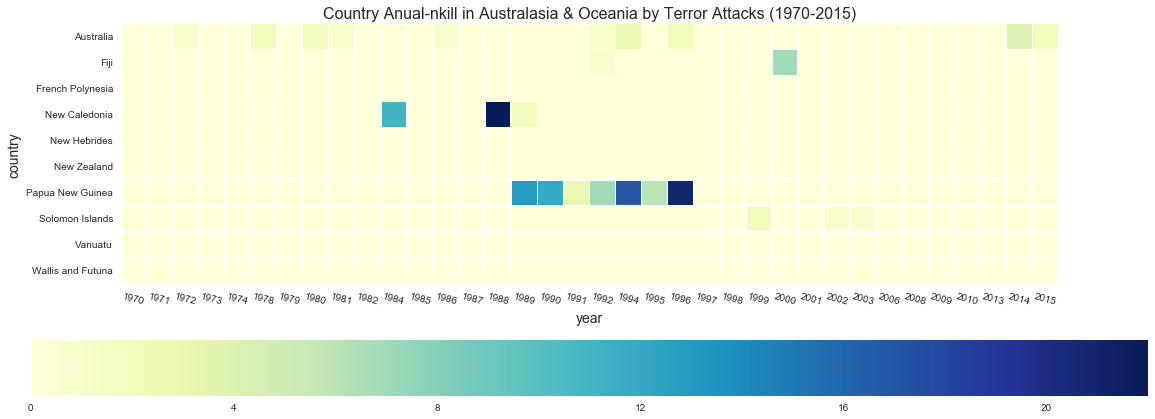

In [185]:
plt_heatmap('Australasia & Oceania', 'nkill')

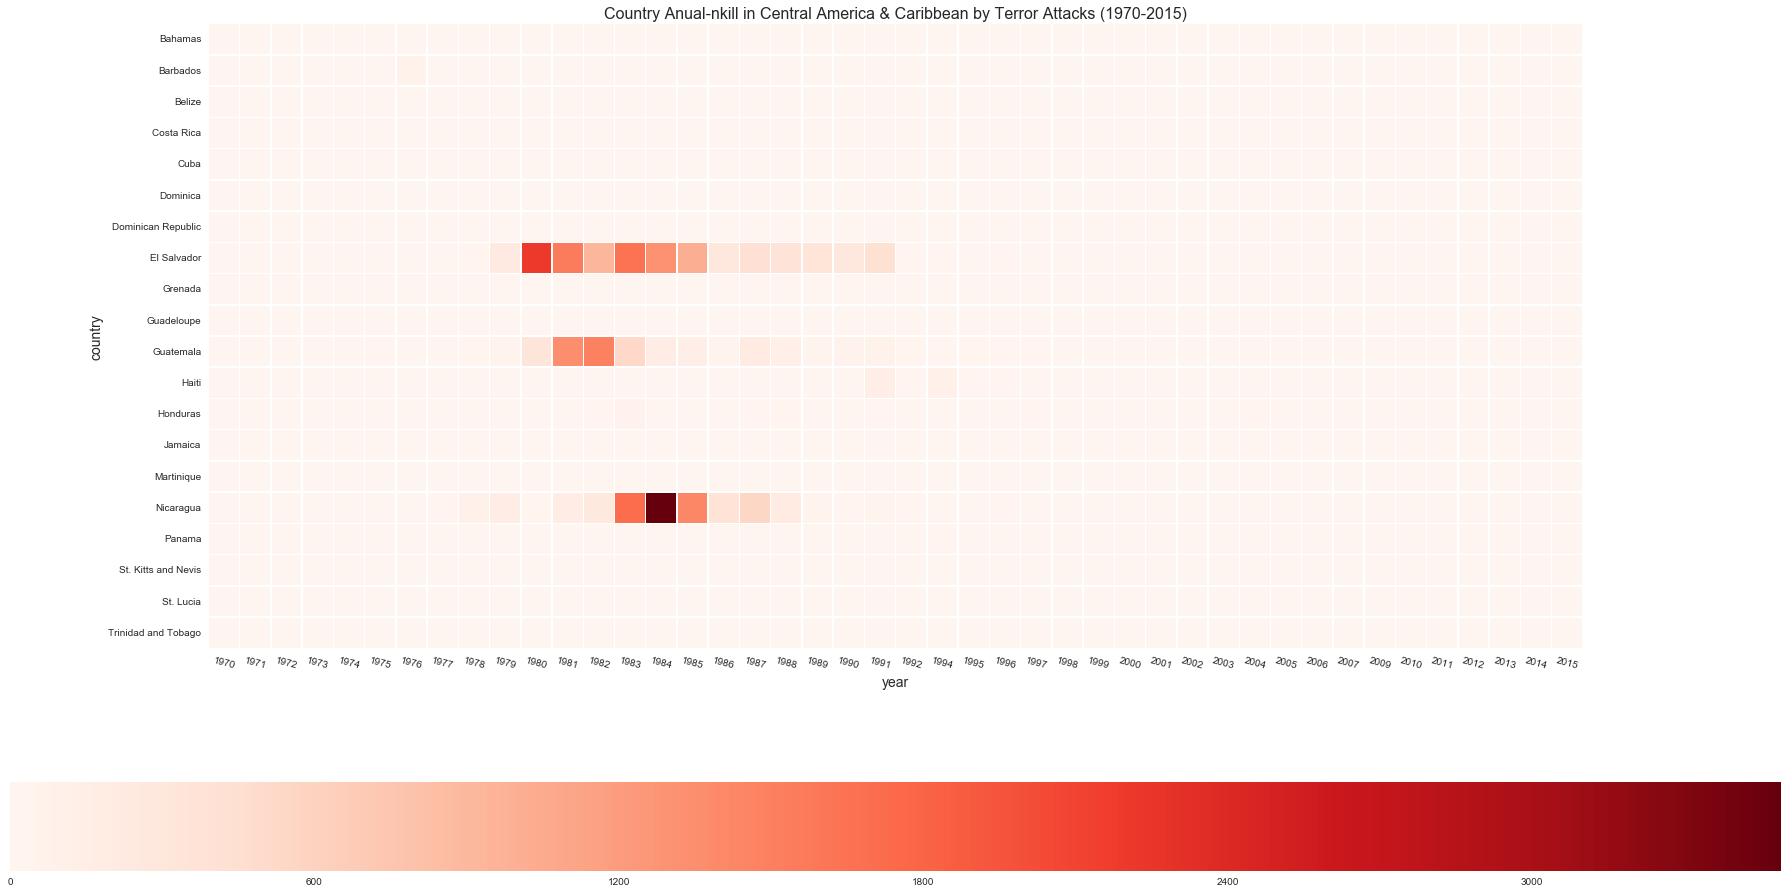

In [167]:
plt_heatmap('Central America & Caribbean', 'nkill')

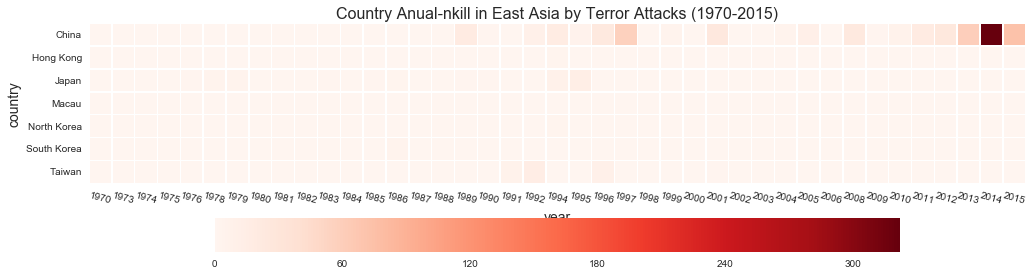

In [168]:
plt_heatmap('East Asia', 'nkill')

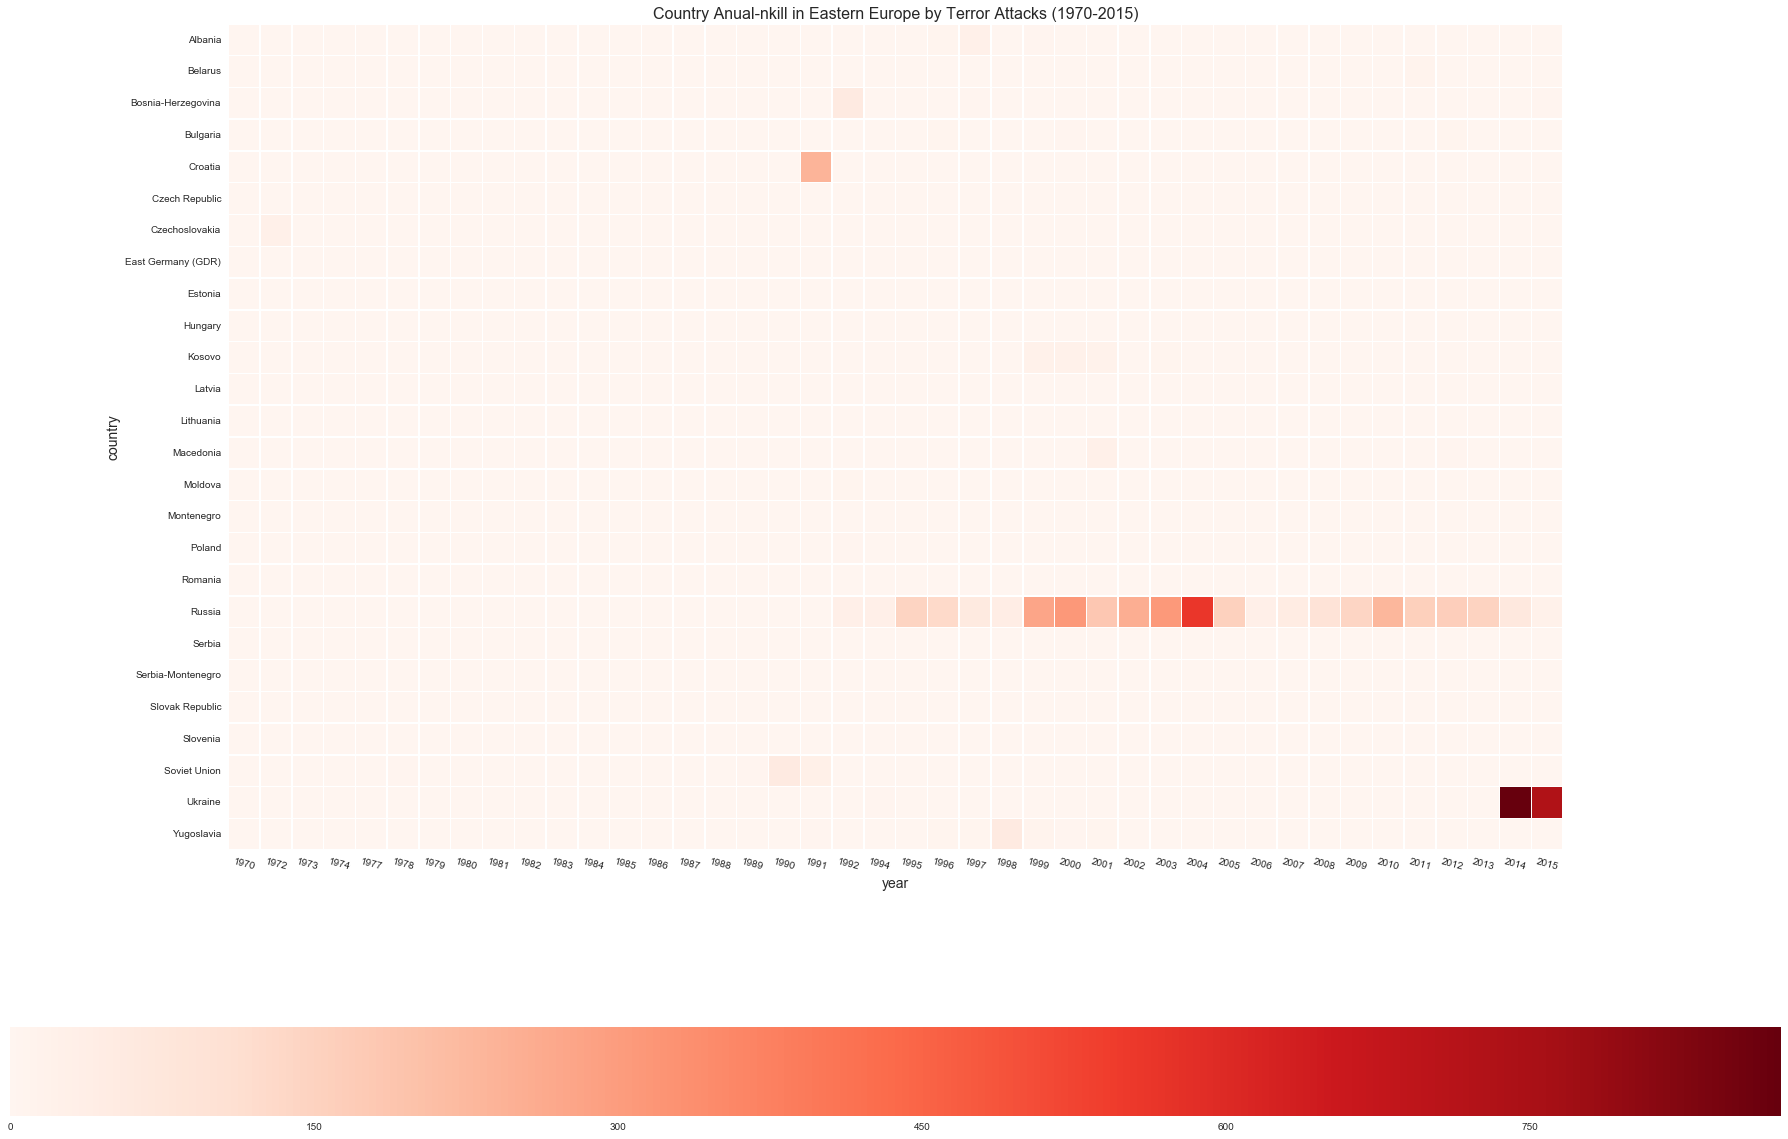

In [169]:
plt_heatmap('Eastern Europe', 'nkill')

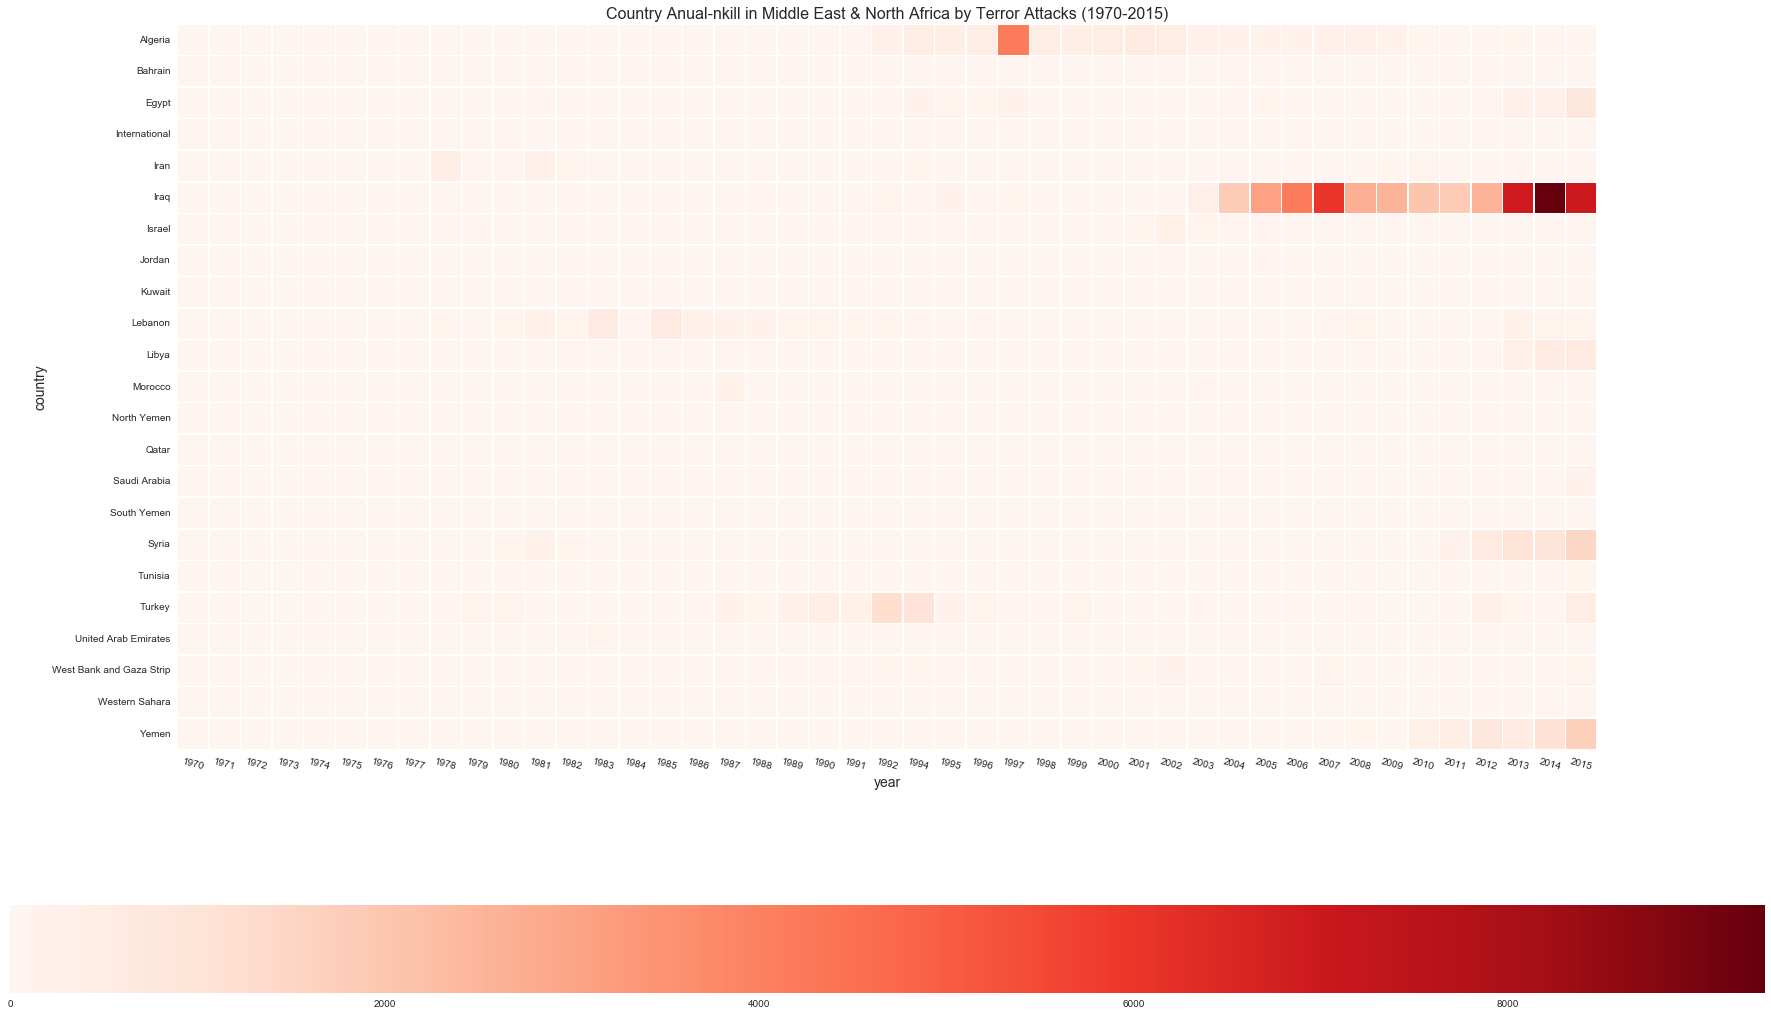

In [170]:
plt_heatmap('Middle East & North Africa', 'nkill')

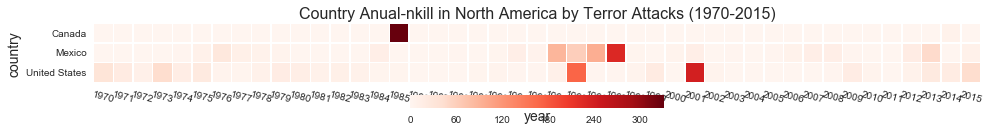

In [171]:
plt_heatmap('North America', 'nkill')

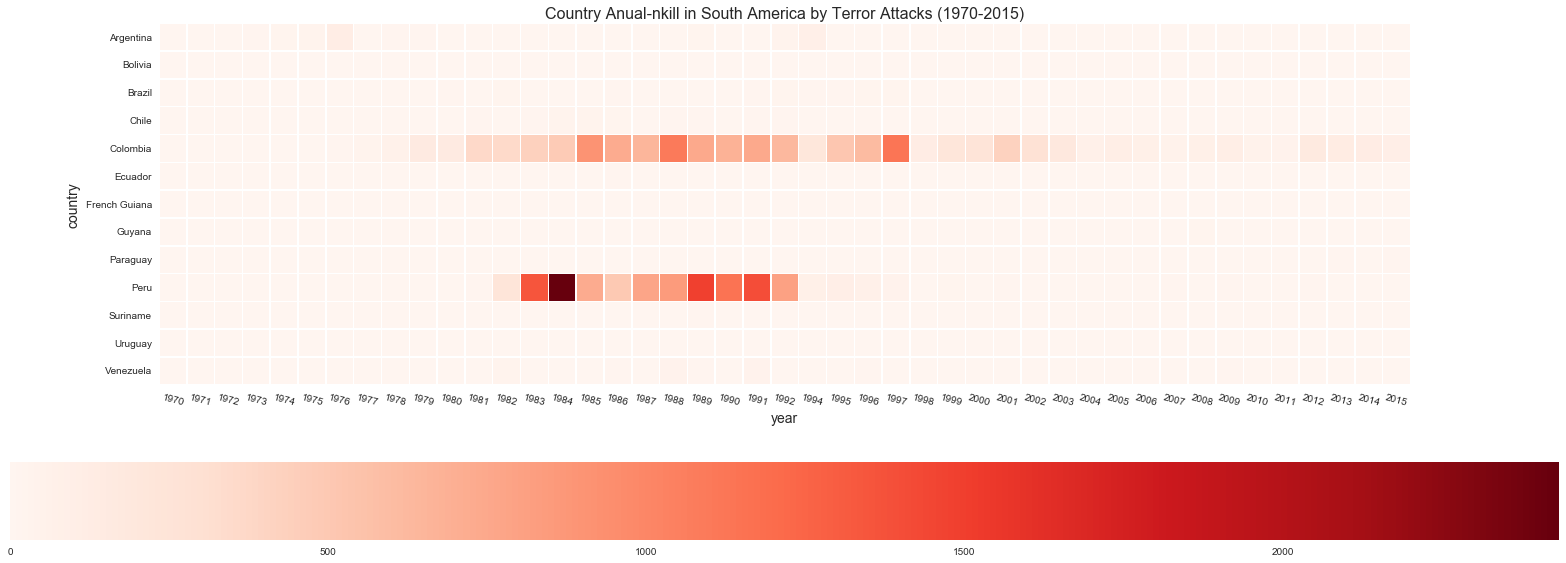

In [172]:
plt_heatmap('South America', 'nkill')

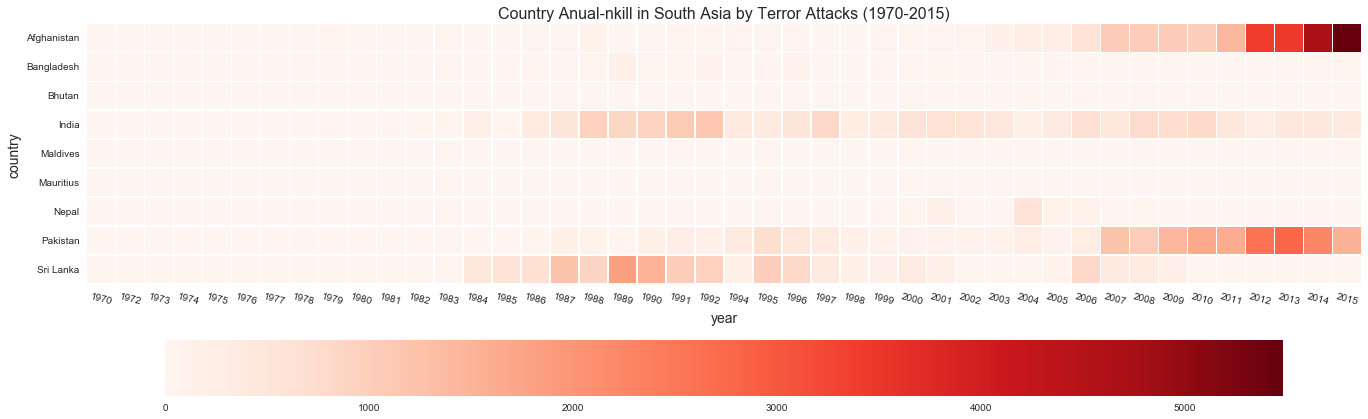

In [173]:
plt_heatmap('South Asia', 'nkill')

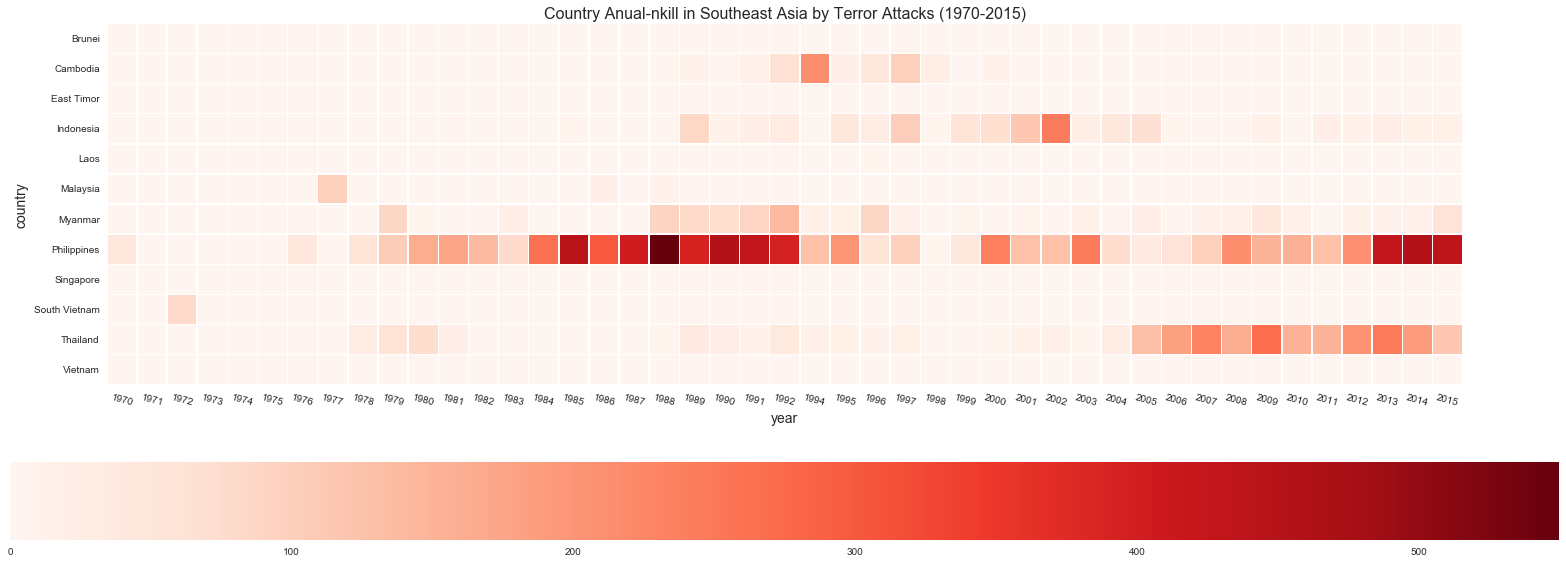

In [174]:
plt_heatmap('Southeast Asia', 'nkill')

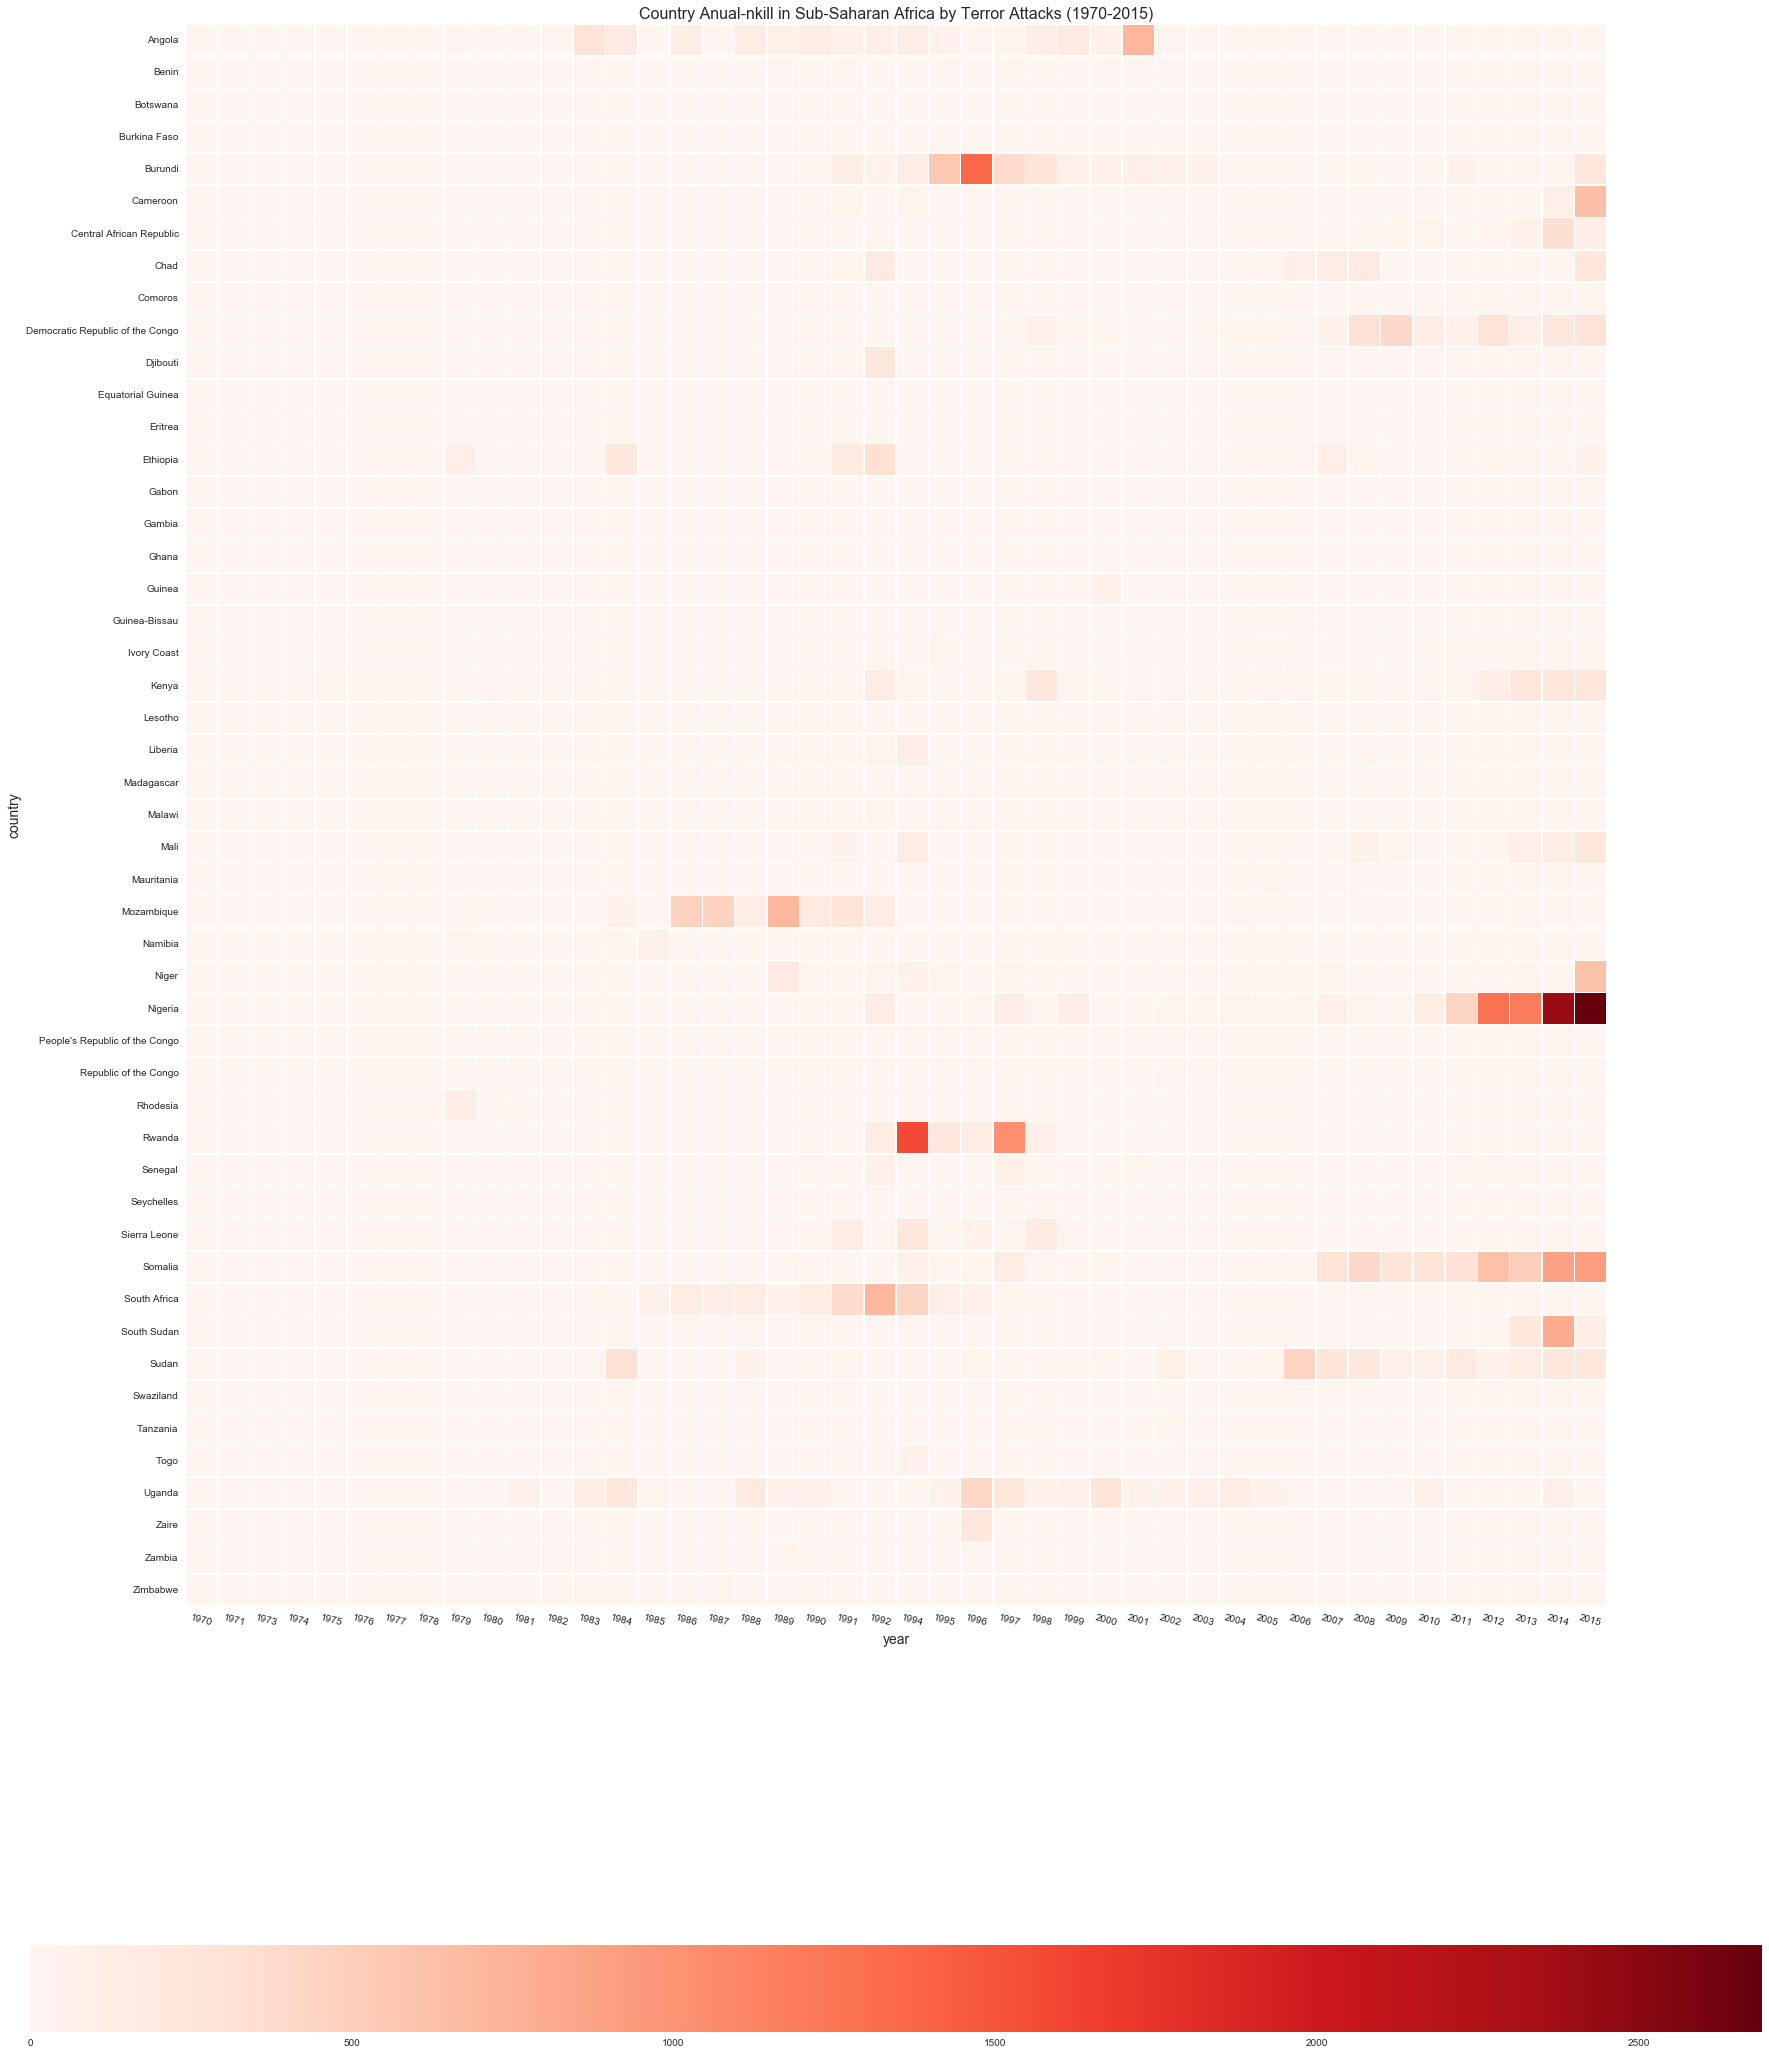

In [175]:
plt_heatmap('Sub-Saharan Africa', 'nkill')

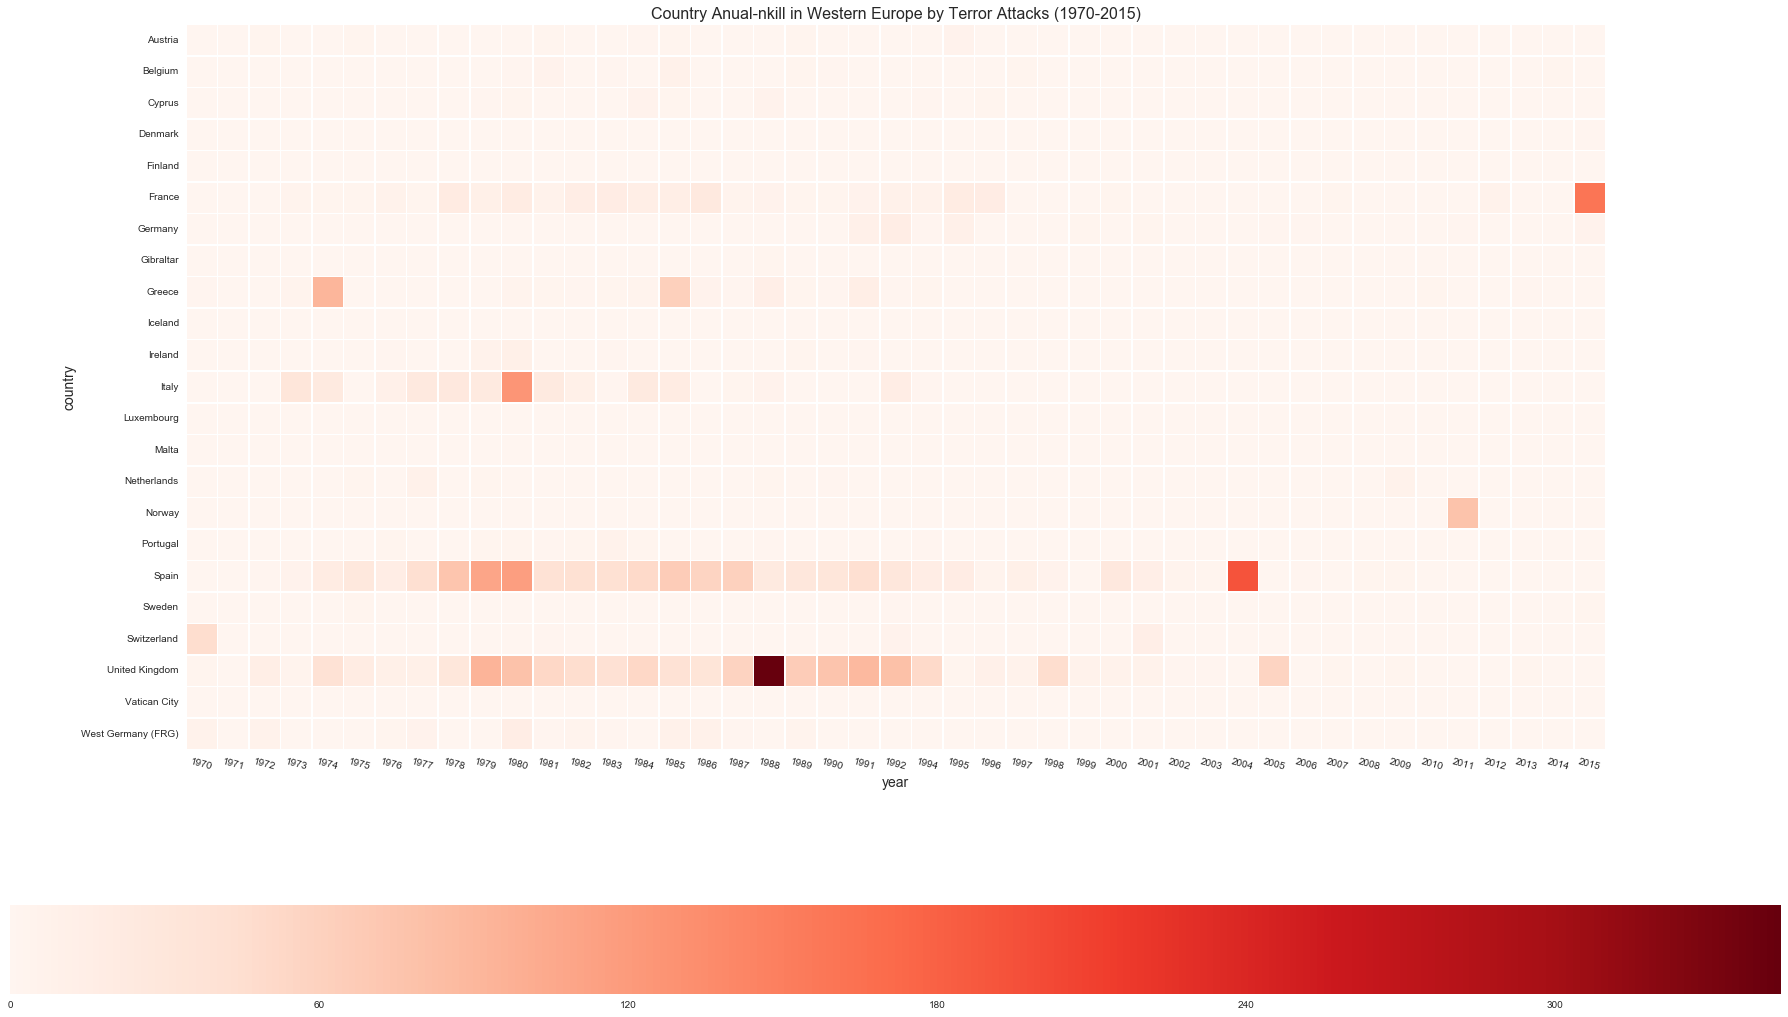

In [176]:
plt_heatmap('Western Europe', 'nkill')

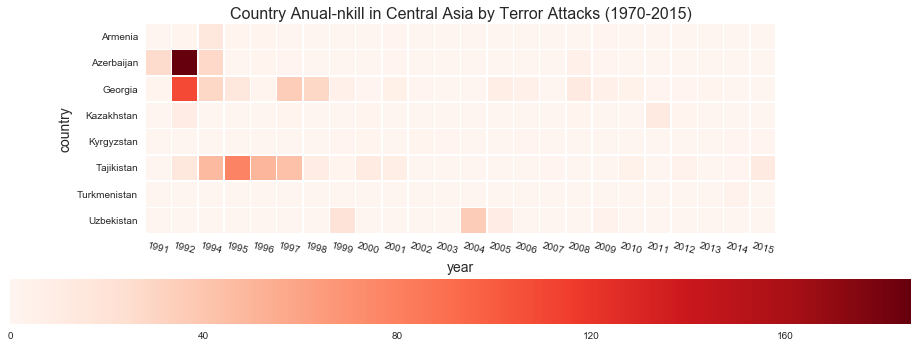

In [177]:
plt_heatmap('Central Asia', 'nkill')

['Australasia & Oceania', 'Central America & Caribbean', 'East Asia', 'Eastern Europe', 'Middle East & North Africa', 'North America', 'South America', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe', 'Central Asia']

### Select Tool for Region

In [194]:
from bokeh.io import output_file, show
from bokeh.layouts import widgetbox
from bokeh.models.widgets import Select

output_file("select.html")

region_sel = Select(title="Region Option:", value='Australasia & Oceania', \
                options=['Australasia & Oceania', 'Central America & Caribbean', 
                         'East Asia', 'Eastern Europe', 'Middle East & North Africa', 
                         'North America', 'South America', 'South Asia', 'Southeast Asia', 
                         'Sub-Saharan Africa', 'Western Europe', 'Central Asia'])

show(widgetbox(region_sel))